# 3.2.1 Hyperparameter Tuning: GCN Model



In this notebook we look at the hyperparameter sensitivity of our GraphSAGE model and then try to find the best hyperparameter combination with a grid search:

- Early Stopping Patience
- Learning Rate
- Dropout Rate
- Weight Decay
- Grid Search

### Dataset Configuration

In [25]:
data_name = 'chrome-run-01'
with_centrality_metrics = False

### Set Up

In [26]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import torch
import sys
import os
import pandas as pd
model_definition_path = os.path.join('..', 'models', 'definitions')
models_path = os.path.join('..', 'src', 'models')
data_path = os.path.join('..', 'src', 'data')
sys.path.append(model_definition_path)
sys.path.append(models_path)
sys.path.append(data_path)
import gnn
import evaluate_model
import train_model

We set the training logs:

In [28]:
csv_file_hyperparameters = os.path.join('..', 'reports', 'gcn', 'hyperparameter_log.csv')
csv_file_grid_search = os.path.join('..', 'reports', 'gcn', 'grid_search_log.csv')

We will be using the dataset without the centrality metrics:

In [29]:
# Load data
if with_centrality_metrics:
    data_name = f"{data_name}-with-centrality-metrics"
else:
    data_name = f"{data_name}-without-centrality-metrics"
    
data_path = os.path.join('..', 'data', 'processed', f'{data_name}.pt')
data = torch.load(data_path)

print(data)

Data(x=[25338, 33], edge_index=[2, 131846], num_nodes=25338, y=[25338], train_mask=[25338], val_mask=[25338], test_mask=[25338])


We initalise our baseline GCN hyperparameters:

In [30]:
# Hyperparameters
hidden_channels = 64
num_epochs = 1000

# Calculating class weights
labels = data.y[data.train_mask]
class_counts = labels.bincount()
class_weights = 1. / class_counts.float()
class_weights = class_weights / class_weights.sum()  # Normalize weights

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = data.to(device)

# Loss function
cross_entropy = torch.nn.CrossEntropyLoss(weight=class_weights.to(device))

### Early Stopping Patience

In [31]:
learning_rate = 0.005
weight_decay = 5e-4
dropout_rate = 0.0

model_early_stop =  [{'model_name': 'GCN Early Stop', 'model': gnn.GCN_2_Layers, 'data_name': data_name, 'data': data, 'hidden_channels': hidden_channels, 'learning_rate': learning_rate, 'num_epochs': num_epochs, 'weight_decay': weight_decay, 'dropout_rate': dropout_rate, 'criterion': cross_entropy}]


Training GCN Early Stop model (1/1) on chrome-run-01-without-centrality-metrics dataset...

Run: 1/3, Model: GCN Early Stop, Epoch: 50, Loss: 0.5789, Val Loss: 0.5783, Val Accuracy: 0.6648, Val Precision: 0.5026, Val Recall: 0.8868, Val F1: 0.6416
Run: 1/3, Model: GCN Early Stop, Epoch: 100, Loss: 0.5223, Val Loss: 0.5170, Val Accuracy: 0.7892, Val Precision: 0.6486, Val Recall: 0.8226, Val F1: 0.7253
Run: 1/3, Model: GCN Early Stop, Epoch: 150, Loss: 0.4931, Val Loss: 0.4891, Val Accuracy: 0.7912, Val Precision: 0.6527, Val Recall: 0.8180, Val F1: 0.7260
Run: 1/3, Model: GCN Early Stop, Epoch: 200, Loss: 0.4740, Val Loss: 0.4724, Val Accuracy: 0.8006, Val Precision: 0.6648, Val Recall: 0.8285, Val F1: 0.7377
Run: 1/3, Model: GCN Early Stop, Epoch: 250, Loss: 0.4607, Val Loss: 0.4642, Val Accuracy: 0.8062, Val Precision: 0.6726, Val Recall: 0.8320, Val F1: 0.7439
Run: 1/3, Model: GCN Early Stop, Epoch: 300, Loss: 0.4506, Val Loss: 0.4491, Val Accuracy: 0.8058, Val Precision: 0.6658, V

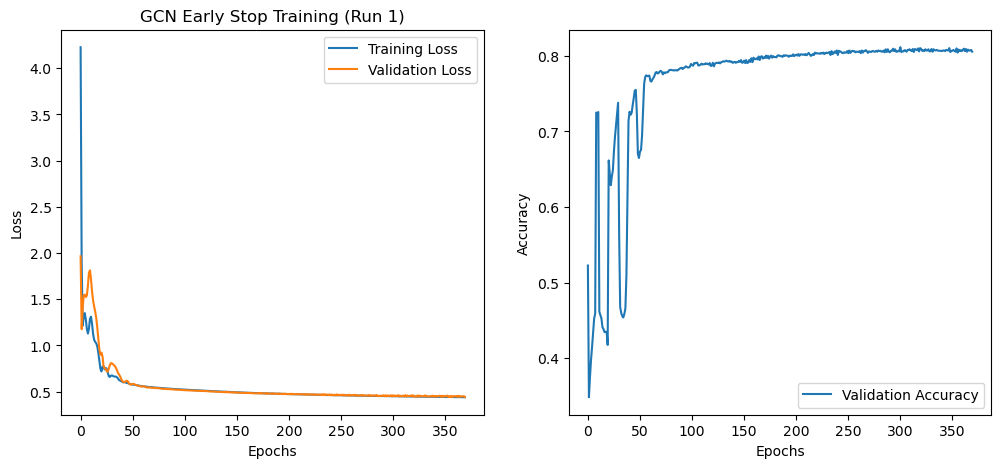

Run: 2/3, Model: GCN Early Stop, Epoch: 50, Loss: 0.5573, Val Loss: 0.5622, Val Accuracy: 0.7781, Val Precision: 0.6228, Val Recall: 0.8728, Val F1: 0.7269
Run: 2/3, Model: GCN Early Stop, Epoch: 100, Loss: 0.5110, Val Loss: 0.5037, Val Accuracy: 0.7896, Val Precision: 0.6397, Val Recall: 0.8658, Val F1: 0.7357
Run: 2/3, Model: GCN Early Stop, Epoch: 150, Loss: 0.4888, Val Loss: 0.4816, Val Accuracy: 0.7975, Val Precision: 0.6547, Val Recall: 0.8495, Val F1: 0.7395
Run: 2/3, Model: GCN Early Stop, Epoch: 200, Loss: 0.4738, Val Loss: 0.4667, Val Accuracy: 0.7971, Val Precision: 0.6569, Val Recall: 0.8378, Val F1: 0.7364
Early stopping at epoch 220


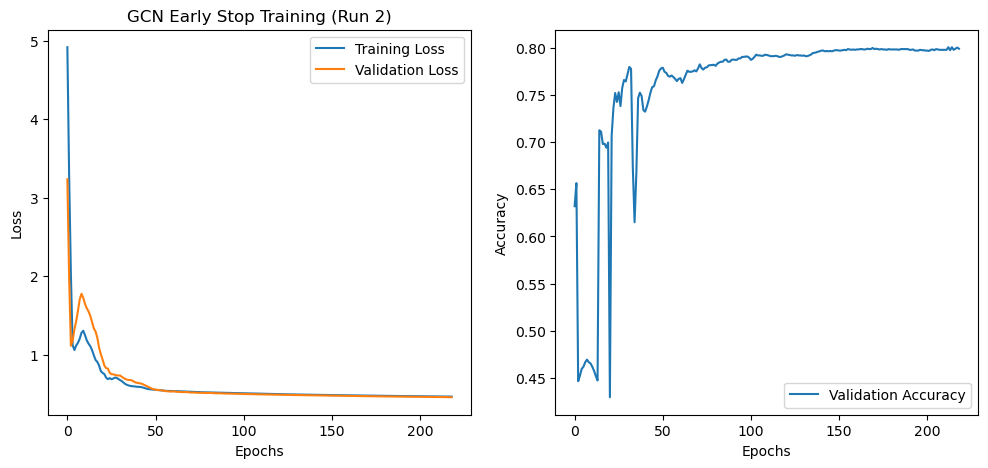

Run: 3/3, Model: GCN Early Stop, Epoch: 50, Loss: 0.6301, Val Loss: 0.5990, Val Accuracy: 0.6368, Val Precision: 0.4813, Val Recall: 0.9487, Val F1: 0.6386
Run: 3/3, Model: GCN Early Stop, Epoch: 100, Loss: 0.5386, Val Loss: 0.5259, Val Accuracy: 0.7671, Val Precision: 0.6084, Val Recall: 0.8740, Val F1: 0.7174
Run: 3/3, Model: GCN Early Stop, Epoch: 150, Loss: 0.5158, Val Loss: 0.5082, Val Accuracy: 0.7797, Val Precision: 0.6255, Val Recall: 0.8693, Val F1: 0.7275
Run: 3/3, Model: GCN Early Stop, Epoch: 200, Loss: 0.4989, Val Loss: 0.4913, Val Accuracy: 0.7884, Val Precision: 0.6407, Val Recall: 0.8530, Val F1: 0.7317
Run: 3/3, Model: GCN Early Stop, Epoch: 250, Loss: 0.4852, Val Loss: 0.4784, Val Accuracy: 0.7935, Val Precision: 0.6513, Val Recall: 0.8390, Val F1: 0.7333
Run: 3/3, Model: GCN Early Stop, Epoch: 300, Loss: 0.4747, Val Loss: 0.4683, Val Accuracy: 0.7991, Val Precision: 0.6588, Val Recall: 0.8425, Val F1: 0.7394
Run: 3/3, Model: GCN Early Stop, Epoch: 350, Loss: 0.4664, 

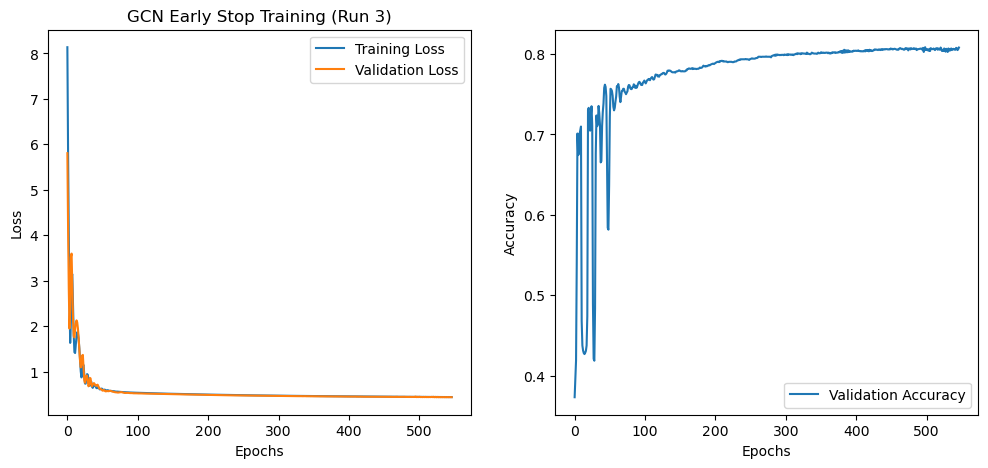


Successfully trained GCN Early Stop model (1/1) on chrome-run-01-without-centrality-metrics dataset

Training GCN Early Stop model (1/1) on chrome-run-01-without-centrality-metrics dataset...

Run: 1/3, Model: GCN Early Stop, Epoch: 50, Loss: 0.6145, Val Loss: 0.6190, Val Accuracy: 0.6613, Val Precision: 0.4997, Val Recall: 0.9312, Val F1: 0.6504
Run: 1/3, Model: GCN Early Stop, Epoch: 100, Loss: 0.5458, Val Loss: 0.5465, Val Accuracy: 0.7714, Val Precision: 0.6143, Val Recall: 0.8716, Val F1: 0.7207
Run: 1/3, Model: GCN Early Stop, Epoch: 150, Loss: 0.5197, Val Loss: 0.5141, Val Accuracy: 0.7809, Val Precision: 0.6263, Val Recall: 0.8740, Val F1: 0.7297
Run: 1/3, Model: GCN Early Stop, Epoch: 200, Loss: 0.5007, Val Loss: 0.4936, Val Accuracy: 0.7872, Val Precision: 0.6371, Val Recall: 0.8623, Val F1: 0.7328
Run: 1/3, Model: GCN Early Stop, Epoch: 250, Loss: 0.4872, Val Loss: 0.4796, Val Accuracy: 0.7967, Val Precision: 0.6508, Val Recall: 0.8611, Val F1: 0.7413
Run: 1/3, Model: GCN E

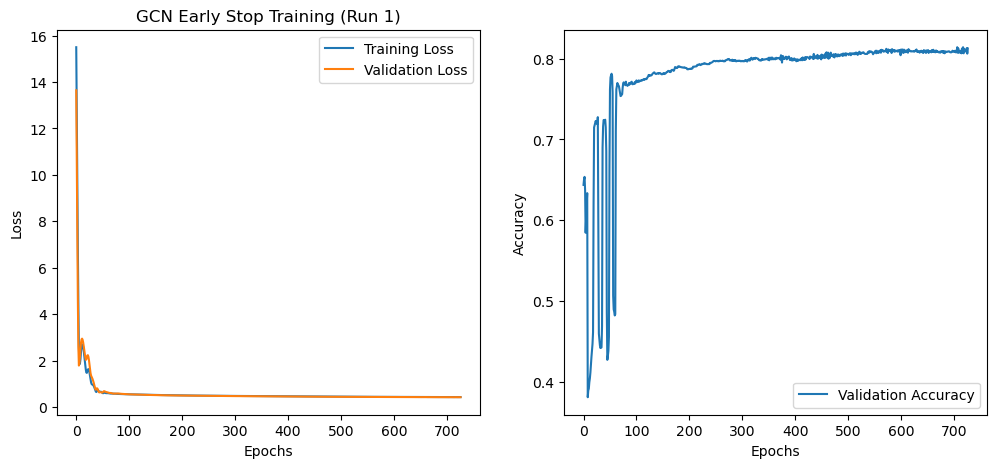

Run: 2/3, Model: GCN Early Stop, Epoch: 50, Loss: 0.5587, Val Loss: 0.5711, Val Accuracy: 0.7663, Val Precision: 0.6042, Val Recall: 0.8961, Val F1: 0.7218
Run: 2/3, Model: GCN Early Stop, Epoch: 100, Loss: 0.5079, Val Loss: 0.4991, Val Accuracy: 0.7884, Val Precision: 0.6427, Val Recall: 0.8436, Val F1: 0.7296
Run: 2/3, Model: GCN Early Stop, Epoch: 150, Loss: 0.4858, Val Loss: 0.4792, Val Accuracy: 0.7900, Val Precision: 0.6503, Val Recall: 0.8203, Val F1: 0.7255
Run: 2/3, Model: GCN Early Stop, Epoch: 200, Loss: 0.4720, Val Loss: 0.4658, Val Accuracy: 0.7931, Val Precision: 0.6569, Val Recall: 0.8133, Val F1: 0.7268
Early stopping at epoch 201


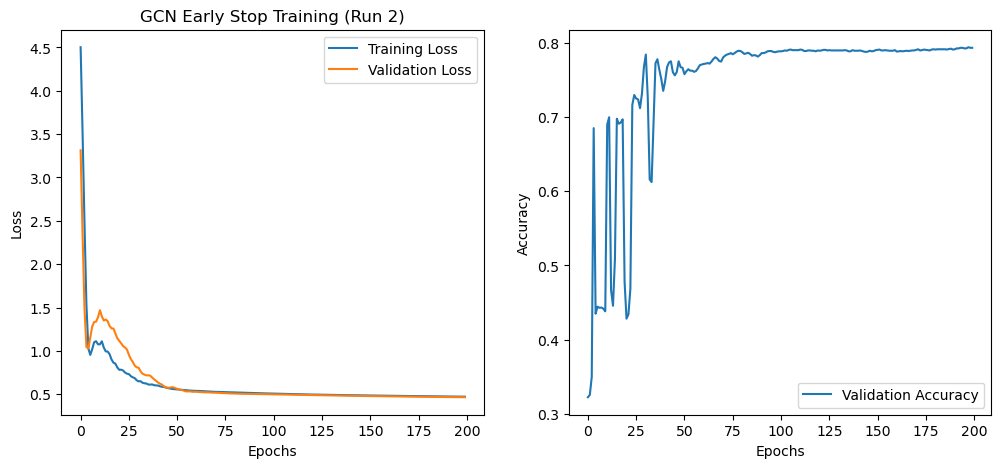

Run: 3/3, Model: GCN Early Stop, Epoch: 50, Loss: 0.5705, Val Loss: 0.5625, Val Accuracy: 0.7655, Val Precision: 0.6009, Val Recall: 0.9137, Val F1: 0.7250
Run: 3/3, Model: GCN Early Stop, Epoch: 100, Loss: 0.5210, Val Loss: 0.5051, Val Accuracy: 0.7884, Val Precision: 0.6371, Val Recall: 0.8705, Val F1: 0.7357
Run: 3/3, Model: GCN Early Stop, Epoch: 150, Loss: 0.4968, Val Loss: 0.4866, Val Accuracy: 0.7927, Val Precision: 0.6495, Val Recall: 0.8413, Val F1: 0.7331
Run: 3/3, Model: GCN Early Stop, Epoch: 200, Loss: 0.4797, Val Loss: 0.4711, Val Accuracy: 0.7994, Val Precision: 0.6579, Val Recall: 0.8483, Val F1: 0.7411
Run: 3/3, Model: GCN Early Stop, Epoch: 250, Loss: 0.4669, Val Loss: 0.4626, Val Accuracy: 0.8030, Val Precision: 0.6648, Val Recall: 0.8425, Val F1: 0.7432
Run: 3/3, Model: GCN Early Stop, Epoch: 300, Loss: 0.4572, Val Loss: 0.4549, Val Accuracy: 0.8026, Val Precision: 0.6654, Val Recall: 0.8378, Val F1: 0.7417
Run: 3/3, Model: GCN Early Stop, Epoch: 350, Loss: 0.4492, 

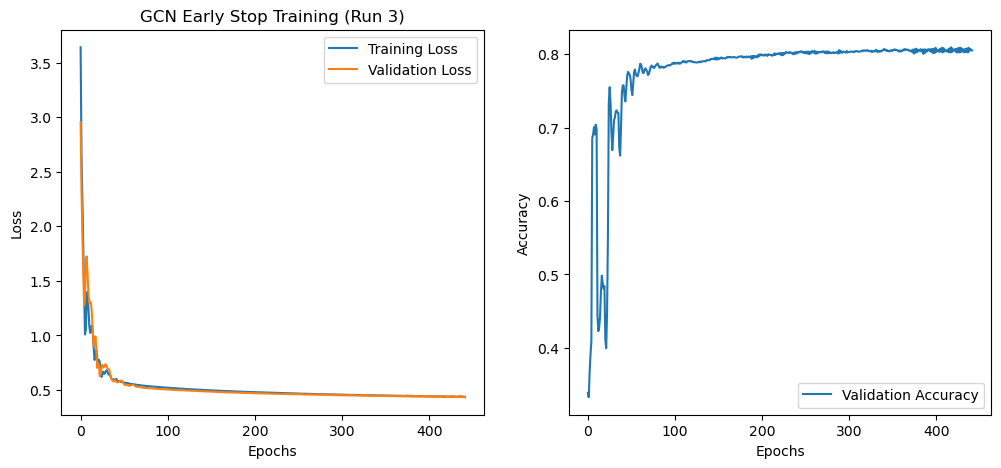


Successfully trained GCN Early Stop model (1/1) on chrome-run-01-without-centrality-metrics dataset

Training GCN Early Stop model (1/1) on chrome-run-01-without-centrality-metrics dataset...

Run: 1/3, Model: GCN Early Stop, Epoch: 50, Loss: 0.6722, Val Loss: 0.8277, Val Accuracy: 0.7651, Val Precision: 0.6019, Val Recall: 0.9032, Val F1: 0.7224
Run: 1/3, Model: GCN Early Stop, Epoch: 100, Loss: 0.5430, Val Loss: 0.5326, Val Accuracy: 0.7706, Val Precision: 0.6111, Val Recall: 0.8856, Val F1: 0.7232
Run: 1/3, Model: GCN Early Stop, Epoch: 150, Loss: 0.5197, Val Loss: 0.5138, Val Accuracy: 0.7852, Val Precision: 0.6327, Val Recall: 0.8705, Val F1: 0.7328
Run: 1/3, Model: GCN Early Stop, Epoch: 200, Loss: 0.5028, Val Loss: 0.4977, Val Accuracy: 0.7923, Val Precision: 0.6440, Val Recall: 0.8635, Val F1: 0.7378
Run: 1/3, Model: GCN Early Stop, Epoch: 250, Loss: 0.4897, Val Loss: 0.4865, Val Accuracy: 0.7947, Val Precision: 0.6495, Val Recall: 0.8541, Val F1: 0.7379
Run: 1/3, Model: GCN E

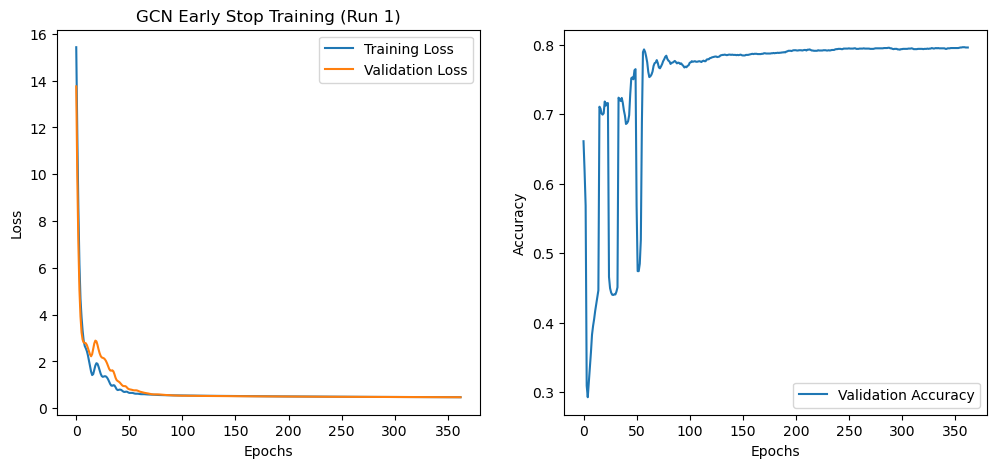

Run: 2/3, Model: GCN Early Stop, Epoch: 50, Loss: 0.6057, Val Loss: 0.6238, Val Accuracy: 0.7414, Val Precision: 0.5753, Val Recall: 0.9008, Val F1: 0.7021
Run: 2/3, Model: GCN Early Stop, Epoch: 100, Loss: 0.5136, Val Loss: 0.5052, Val Accuracy: 0.7801, Val Precision: 0.6307, Val Recall: 0.8448, Val F1: 0.7222
Run: 2/3, Model: GCN Early Stop, Epoch: 150, Loss: 0.4897, Val Loss: 0.4829, Val Accuracy: 0.7939, Val Precision: 0.6524, Val Recall: 0.8366, Val F1: 0.7331
Run: 2/3, Model: GCN Early Stop, Epoch: 200, Loss: 0.4749, Val Loss: 0.4682, Val Accuracy: 0.7994, Val Precision: 0.6632, Val Recall: 0.8273, Val F1: 0.7362
Run: 2/3, Model: GCN Early Stop, Epoch: 250, Loss: 0.4631, Val Loss: 0.4578, Val Accuracy: 0.8030, Val Precision: 0.6692, Val Recall: 0.8261, Val F1: 0.7394
Run: 2/3, Model: GCN Early Stop, Epoch: 300, Loss: 0.4535, Val Loss: 0.4497, Val Accuracy: 0.8034, Val Precision: 0.6692, Val Recall: 0.8285, Val F1: 0.7404
Run: 2/3, Model: GCN Early Stop, Epoch: 350, Loss: 0.4462, 

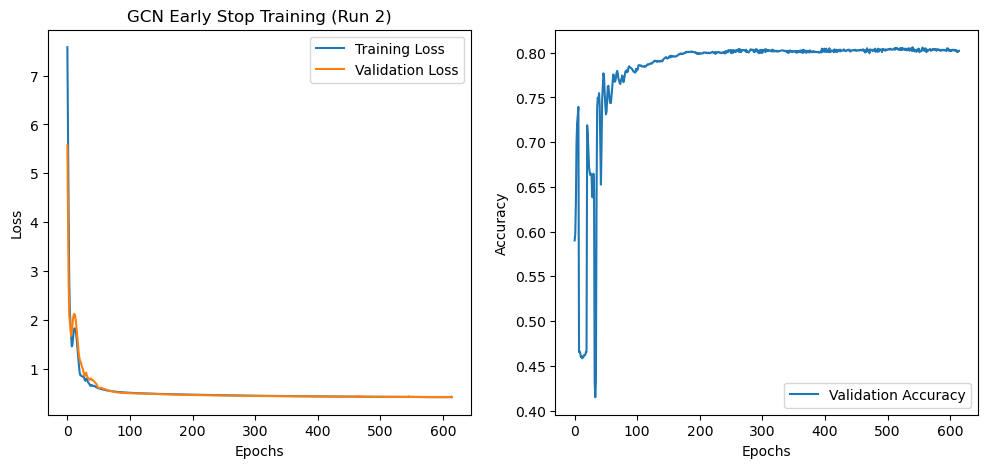

Run: 3/3, Model: GCN Early Stop, Epoch: 50, Loss: 0.6189, Val Loss: 0.6235, Val Accuracy: 0.7264, Val Precision: 0.5594, Val Recall: 0.9008, Val F1: 0.6902
Run: 3/3, Model: GCN Early Stop, Epoch: 100, Loss: 0.5378, Val Loss: 0.5285, Val Accuracy: 0.7742, Val Precision: 0.6130, Val Recall: 0.9020, Val F1: 0.7299
Run: 3/3, Model: GCN Early Stop, Epoch: 150, Loss: 0.5064, Val Loss: 0.5038, Val Accuracy: 0.7817, Val Precision: 0.6293, Val Recall: 0.8635, Val F1: 0.7280
Run: 3/3, Model: GCN Early Stop, Epoch: 200, Loss: 0.4877, Val Loss: 0.4883, Val Accuracy: 0.7872, Val Precision: 0.6422, Val Recall: 0.8378, Val F1: 0.7271
Early stopping at epoch 242


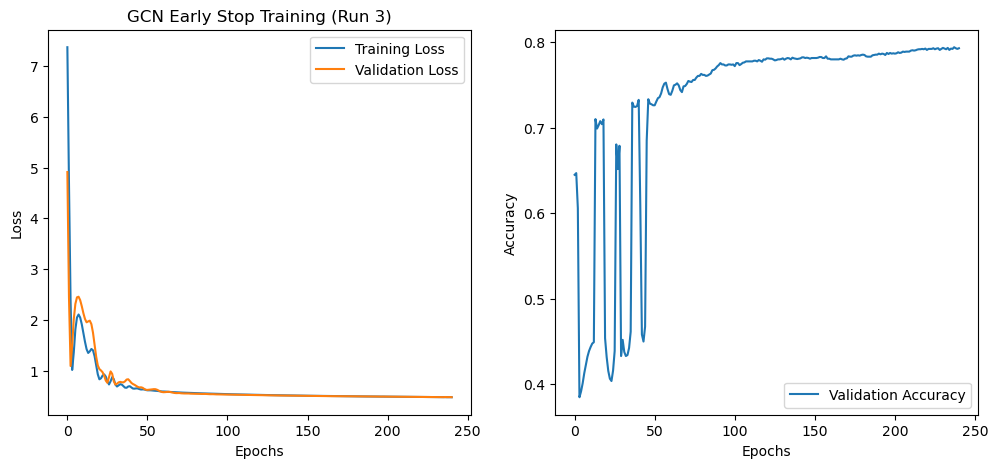


Successfully trained GCN Early Stop model (1/1) on chrome-run-01-without-centrality-metrics dataset


In [32]:
model_early_stop_50 =  train_model.train_validate(model_early_stop, csv_file_hyperparameters, num_runs=3, early_stopping_patience=50)
model_early_stop_100 =  train_model.train_validate(model_early_stop, csv_file_hyperparameters, num_runs=3, early_stopping_patience=100)
model_early_stop_150 =  train_model.train_validate(model_early_stop, csv_file_hyperparameters, num_runs=3, early_stopping_patience=150)

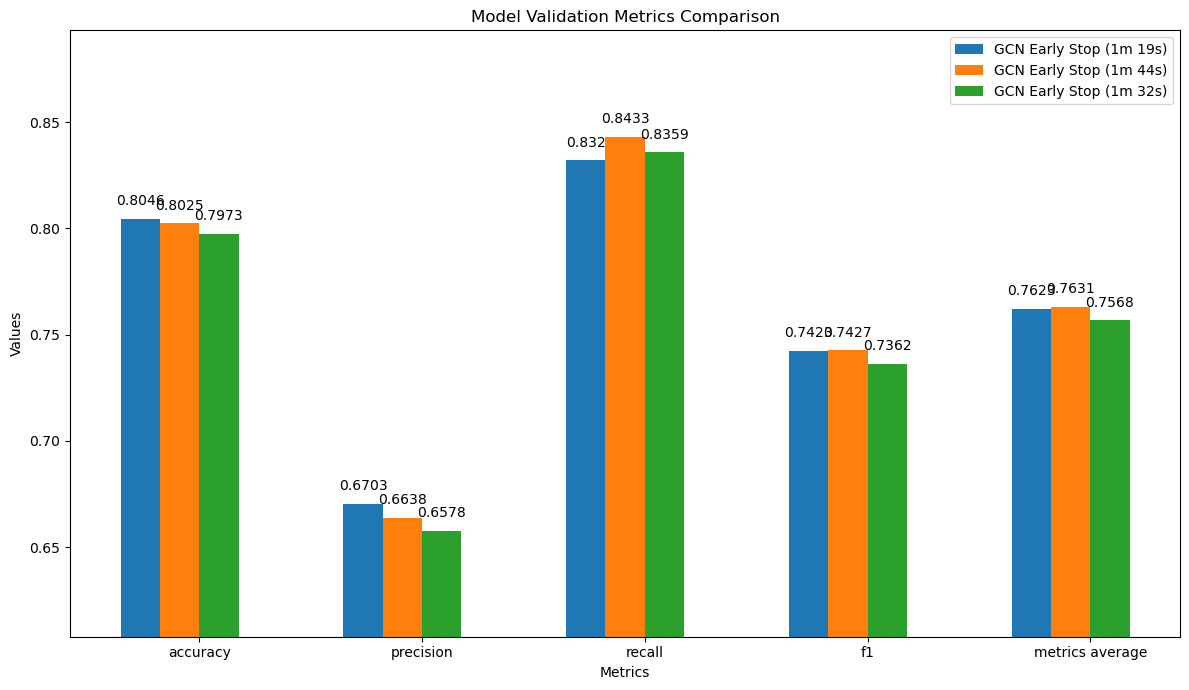

Standard Deviation for Accuracy: 0.003
Standard Deviation for Precision: 0.005
Standard Deviation for Recall: 0.005
Standard Deviation for F1: 0.003


In [33]:
evaluate_model.plot_val_metrics(model_early_stop_50 + model_early_stop_100 + model_early_stop_150)

### Learning Rate

In [34]:
dropout_rate = 0.0
weight_decay = 5e-4

models_learning_rates = [
    {'model_name': 'GCN LR 0.0005', 'model': gnn.GCN_2_Layers, 'data_name': data_name, 'data': data, 'hidden_channels': hidden_channels, 'learning_rate': 0.0005, 'num_epochs': num_epochs, 'weight_decay': weight_decay, 'dropout_rate': dropout_rate, 'criterion': cross_entropy},
    {'model_name': 'GCN LR 0.001', 'model': gnn.GCN_2_Layers, 'data_name': data_name, 'data': data, 'hidden_channels': hidden_channels, 'learning_rate': 0.001, 'num_epochs': num_epochs, 'weight_decay': weight_decay, 'dropout_rate': dropout_rate, 'criterion': cross_entropy},
    {'model_name': 'GCN LR 0.005', 'model': gnn.GCN_2_Layers, 'data_name': data_name, 'data': data, 'hidden_channels': hidden_channels, 'learning_rate': 0.005, 'num_epochs': num_epochs, 'weight_decay': weight_decay, 'dropout_rate': dropout_rate, 'criterion': cross_entropy},
    {'model_name': 'GCN LR 0.01', 'model': gnn.GCN_2_Layers, 'data_name': data_name, 'data': data, 'hidden_channels': hidden_channels, 'learning_rate': 0.01, 'num_epochs': num_epochs, 'weight_decay': weight_decay, 'dropout_rate': dropout_rate, 'criterion': cross_entropy},
    {'model_name': 'GCN LR 0.05', 'model': gnn.GCN_2_Layers, 'data_name': data_name, 'data': data, 'hidden_channels': hidden_channels, 'learning_rate': 0.05, 'num_epochs': num_epochs, 'weight_decay': weight_decay, 'dropout_rate': dropout_rate, 'criterion': cross_entropy},
]

In [35]:
trained_models_learning_rates = train_model.train_validate(models_learning_rates, csv_file_hyperparameters, num_runs=3, plot_training=False, print_epochs=False)


Training GCN LR 0.0005 model (1/5) on chrome-run-01-without-centrality-metrics dataset...



Run 3/3, GCN LR 0.0005 (Early stop):  20%|██        | 200/1000 [00:45<03:01,  4.40it/s]



Successfully trained GCN LR 0.0005 model (1/5) on chrome-run-01-without-centrality-metrics dataset

Training GCN LR 0.001 model (2/5) on chrome-run-01-without-centrality-metrics dataset...



Run 3/3, GCN LR 0.001 (Early stop):  32%|███▏      | 324/1000 [01:13<02:33,  4.39it/s]



Successfully trained GCN LR 0.001 model (2/5) on chrome-run-01-without-centrality-metrics dataset

Training GCN LR 0.005 model (3/5) on chrome-run-01-without-centrality-metrics dataset...



Run 3/3, GCN LR 0.005 (Early stop):  38%|███▊      | 379/1000 [01:26<02:21,  4.40it/s]



Successfully trained GCN LR 0.005 model (3/5) on chrome-run-01-without-centrality-metrics dataset

Training GCN LR 0.01 model (4/5) on chrome-run-01-without-centrality-metrics dataset...



Run 3/3, GCN LR 0.01 (Early stop):  42%|████▎     | 425/1000 [01:36<02:10,  4.41it/s]



Successfully trained GCN LR 0.01 model (4/5) on chrome-run-01-without-centrality-metrics dataset

Training GCN LR 0.05 model (5/5) on chrome-run-01-without-centrality-metrics dataset...



Run 3/3, GCN LR 0.05 (Early stop):  35%|███▍      | 349/1000 [01:19<02:28,  4.39it/s]


Successfully trained GCN LR 0.05 model (5/5) on chrome-run-01-without-centrality-metrics dataset


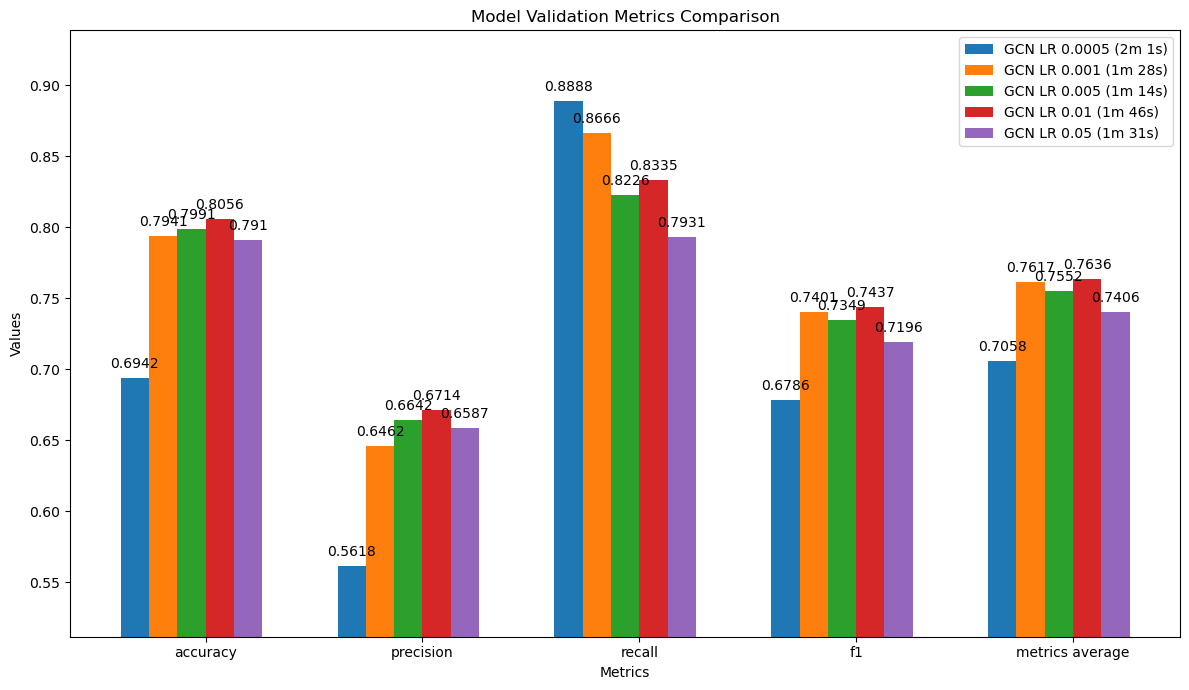

Standard Deviation for Accuracy: 0.042
Standard Deviation for Precision: 0.040
Standard Deviation for Recall: 0.034
Standard Deviation for F1: 0.024


In [36]:
evaluate_model.plot_val_metrics(trained_models_learning_rates)

### Dropout Rate

In [37]:
learning_rate = 0.005
weight_decays = 5e-4

models_dropout_rates = [
    {'model_name': 'GCN DR 0.0', 'model': gnn.GCN_2_Layers, 'data_name': data_name, 'data': data, 'hidden_channels': hidden_channels, 'learning_rate': learning_rate, 'num_epochs': num_epochs, 'weight_decay': weight_decay, 'dropout_rate': 0.0, 'criterion': cross_entropy},
    {'model_name': 'GCN DR 0.1', 'model': gnn.GCN_2_Layers, 'data_name': data_name, 'data': data, 'hidden_channels': hidden_channels, 'learning_rate': learning_rate, 'num_epochs': num_epochs, 'weight_decay': weight_decay, 'dropout_rate': 0.1, 'criterion': cross_entropy},
    {'model_name': 'GCN DR 0.3', 'model': gnn.GCN_2_Layers, 'data_name': data_name, 'data': data, 'hidden_channels': hidden_channels, 'learning_rate': learning_rate, 'num_epochs': num_epochs, 'weight_decay': weight_decay, 'dropout_rate': 0.3, 'criterion': cross_entropy},
    {'model_name': 'GCN DR 0.5', 'model': gnn.GCN_2_Layers, 'data_name': data_name, 'data': data, 'hidden_channels': hidden_channels, 'learning_rate': learning_rate, 'num_epochs': num_epochs, 'weight_decay': weight_decay, 'dropout_rate': 0.5, 'criterion': cross_entropy},
    {'model_name': 'GCN DR 0.7', 'model': gnn.GCN_2_Layers, 'data_name': data_name, 'data': data, 'hidden_channels': hidden_channels, 'learning_rate': learning_rate, 'num_epochs': num_epochs, 'weight_decay': weight_decay, 'dropout_rate': 0.7, 'criterion': cross_entropy}
]

In [38]:
trained_models_dropout_rates = train_model.train_validate(models_dropout_rates, csv_file_hyperparameters, num_runs=3, plot_training=False, print_epochs=False)


Training GCN DR 0.0 model (1/5) on chrome-run-01-without-centrality-metrics dataset...



Run 3/3, GCN DR 0.0 (Early stop):  20%|██        | 200/1000 [00:45<03:03,  4.36it/s]



Successfully trained GCN DR 0.0 model (1/5) on chrome-run-01-without-centrality-metrics dataset

Training GCN DR 0.1 model (2/5) on chrome-run-01-without-centrality-metrics dataset...



Run 3/3, GCN DR 0.1 (Early stop):  25%|██▍       | 246/1000 [01:04<03:18,  3.79it/s]



Successfully trained GCN DR 0.1 model (2/5) on chrome-run-01-without-centrality-metrics dataset

Training GCN DR 0.3 model (3/5) on chrome-run-01-without-centrality-metrics dataset...



Run 3/3, GCN DR 0.3 (Early stop):  22%|██▏       | 221/1000 [00:58<03:27,  3.76it/s]



Successfully trained GCN DR 0.3 model (3/5) on chrome-run-01-without-centrality-metrics dataset

Training GCN DR 0.5 model (4/5) on chrome-run-01-without-centrality-metrics dataset...



Run 3/3, GCN DR 0.5 (Early stop):  20%|██        | 200/1000 [00:53<03:33,  3.76it/s]



Successfully trained GCN DR 0.5 model (4/5) on chrome-run-01-without-centrality-metrics dataset

Training GCN DR 0.7 model (5/5) on chrome-run-01-without-centrality-metrics dataset...



Run 3/3, GCN DR 0.7 (Early stop):  20%|██        | 200/1000 [00:53<03:33,  3.76it/s]


Successfully trained GCN DR 0.7 model (5/5) on chrome-run-01-without-centrality-metrics dataset


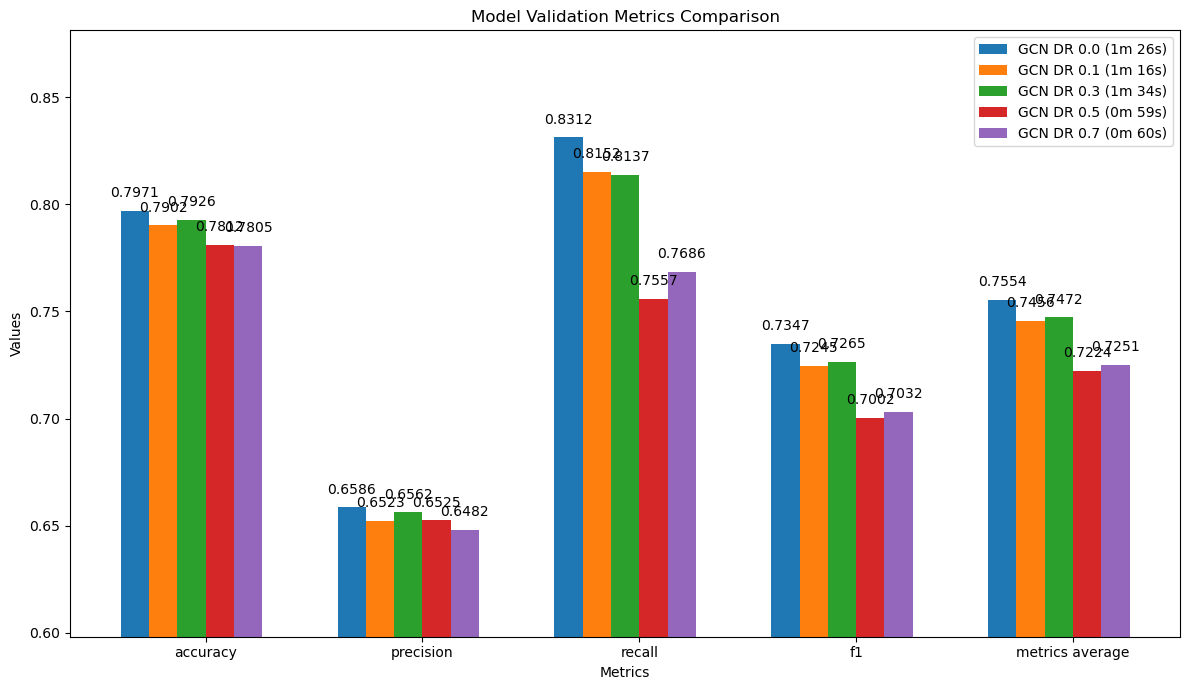

Standard Deviation for Accuracy: 0.007
Standard Deviation for Precision: 0.004
Standard Deviation for Recall: 0.029
Standard Deviation for F1: 0.014


In [39]:
evaluate_model.plot_val_metrics(trained_models_dropout_rates)

### Weight Decay

In [40]:
learning_rates = 0.005
dropout_rates = 0.0

models_weight_decays = [
    {'model_name': 'GCN WD 5e-5', 'model': gnn.GCN_2_Layers, 'data_name': data_name, 'data': data, 'hidden_channels': hidden_channels, 'learning_rate': learning_rate, 'num_epochs': num_epochs, 'weight_decay': 5e-5, 'dropout_rate': 0.0, 'criterion': cross_entropy},
    {'model_name': 'GCN WD 1e-5', 'model': gnn.GCN_2_Layers, 'data_name': data_name, 'data': data, 'hidden_channels': hidden_channels, 'learning_rate': learning_rate, 'num_epochs': num_epochs, 'weight_decay': 1e-5, 'dropout_rate': 0.1, 'criterion': cross_entropy},
    {'model_name': 'GCN WD 5e-4', 'model': gnn.GCN_2_Layers, 'data_name': data_name, 'data': data, 'hidden_channels': hidden_channels, 'learning_rate': learning_rate, 'num_epochs': num_epochs, 'weight_decay': 5e-4, 'dropout_rate': 0.3, 'criterion': cross_entropy},
    {'model_name': 'GCN WD 1e-4', 'model': gnn.GCN_2_Layers, 'data_name': data_name, 'data': data, 'hidden_channels': hidden_channels, 'learning_rate': learning_rate, 'num_epochs': num_epochs, 'weight_decay': 1e-4, 'dropout_rate': 0.5, 'criterion': cross_entropy},
    {'model_name': 'GCN WD 5e-3', 'model': gnn.GCN_2_Layers, 'data_name': data_name, 'data': data, 'hidden_channels': hidden_channels, 'learning_rate': learning_rate, 'num_epochs': num_epochs, 'weight_decay': 5e-3, 'dropout_rate': 0.7, 'criterion': cross_entropy}
]

In [41]:
trained_models_weight_decays = train_model.train_validate(models_weight_decays, csv_file_hyperparameters, num_runs=3, plot_training=False, print_epochs=False)


Training GCN WD 5e-5 model (1/5) on chrome-run-01-without-centrality-metrics dataset...



Run 3/3, GCN WD 5e-5 (Early stop):  28%|██▊       | 279/1000 [01:03<02:45,  4.37it/s]



Successfully trained GCN WD 5e-5 model (1/5) on chrome-run-01-without-centrality-metrics dataset

Training GCN WD 1e-5 model (2/5) on chrome-run-01-without-centrality-metrics dataset...



Run 3/3, GCN WD 1e-5 (Early stop):  20%|██        | 200/1000 [00:53<03:33,  3.75it/s]



Successfully trained GCN WD 1e-5 model (2/5) on chrome-run-01-without-centrality-metrics dataset

Training GCN WD 5e-4 model (3/5) on chrome-run-01-without-centrality-metrics dataset...



Run 3/3, GCN WD 5e-4 (Early stop):  46%|████▌     | 455/1000 [02:00<02:24,  3.77it/s]



Successfully trained GCN WD 5e-4 model (3/5) on chrome-run-01-without-centrality-metrics dataset

Training GCN WD 1e-4 model (4/5) on chrome-run-01-without-centrality-metrics dataset...



Run 3/3, GCN WD 1e-4 (Early stop):  22%|██▏       | 223/1000 [00:58<03:24,  3.80it/s]



Successfully trained GCN WD 1e-4 model (4/5) on chrome-run-01-without-centrality-metrics dataset

Training GCN WD 5e-3 model (5/5) on chrome-run-01-without-centrality-metrics dataset...



Run 3/3, GCN WD 5e-3 (Early stop):  20%|██        | 200/1000 [00:53<03:33,  3.75it/s]


Successfully trained GCN WD 5e-3 model (5/5) on chrome-run-01-without-centrality-metrics dataset


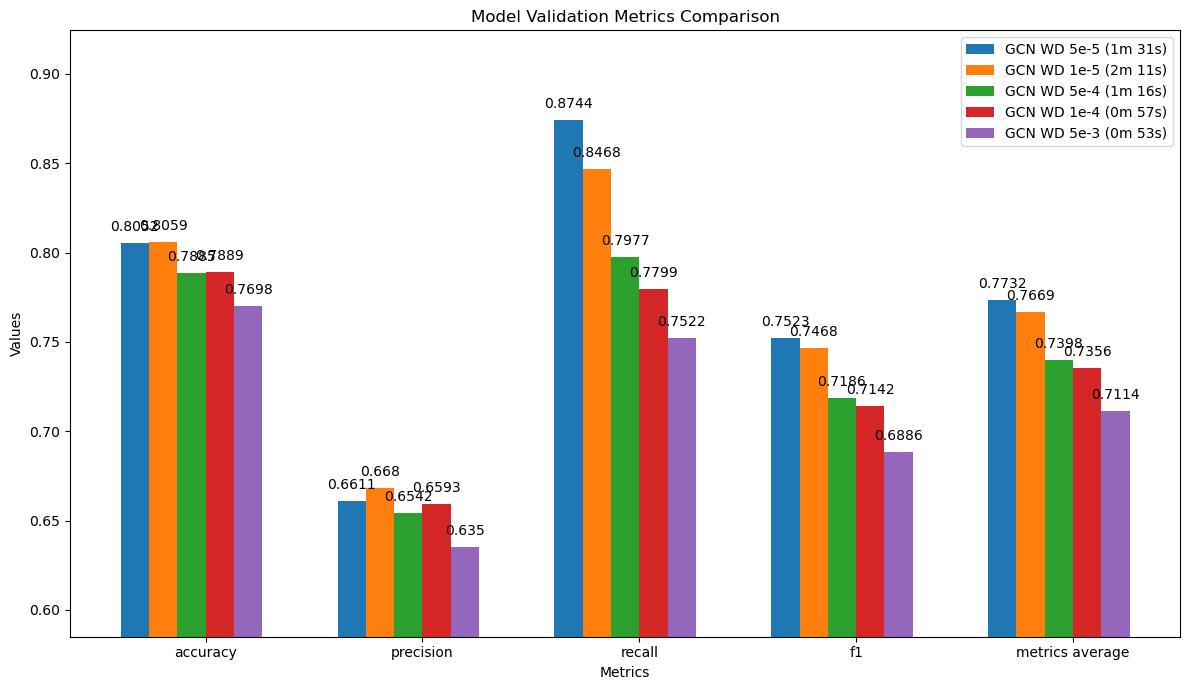

Standard Deviation for Accuracy: 0.013
Standard Deviation for Precision: 0.011
Standard Deviation for Recall: 0.044
Standard Deviation for F1: 0.023


In [42]:
evaluate_model.plot_val_metrics(trained_models_weight_decays)

### Grid Search

In [51]:
models = [
    {
        'model_name': 'GCN',
        'model': gnn.GCN_2_Layers,
        'data_name': data_name,
        'data': data, 
        'hidden_channels': hidden_channels,
        'num_epochs': 1000,
        'criterion': cross_entropy
    }
]

learning_rates = [0.001, 0.005, 0.0075, 0.01, 0.015]
dropout_rates = [0.0, 0.1, 0.2, 0.3, 0.4]
weight_decays = [5e-6, 1e-6, 5e-5, 1e-5, 5e-4]

In [52]:
grid_search = evaluate_model.grid_search(models, csv_file_grid_search, learning_rates, dropout_rates, weight_decays, num_runs=1)


Training configuration 1/125: Learning Rate=0.001, Dropout Rate=0.0, Weight Decay=5e-06...

Training GCN LR=0.001, DR=0.0, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.001, DR=0.0, WD=5e-06 (Early stop):  61%|██████▏   | 613/1000 [01:44<01:05,  5.87it/s]



Successfully trained GCN LR=0.001, DR=0.0, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 1/125

Training configuration 2/125: Learning Rate=0.001, Dropout Rate=0.0, Weight Decay=1e-06...

Training GCN LR=0.001, DR=0.0, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.001, DR=0.0, WD=1e-06 (Early stop):  83%|████████▎ | 828/1000 [02:52<00:35,  4.79it/s]



Successfully trained GCN LR=0.001, DR=0.0, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 2/125

Training configuration 3/125: Learning Rate=0.001, Dropout Rate=0.0, Weight Decay=5e-05...

Training GCN LR=0.001, DR=0.0, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.001, DR=0.0, WD=5e-05 (Early stop):  23%|██▎       | 231/1000 [00:52<02:55,  4.39it/s]



Successfully trained GCN LR=0.001, DR=0.0, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 3/125

Training configuration 4/125: Learning Rate=0.001, Dropout Rate=0.0, Weight Decay=1e-05...

Training GCN LR=0.001, DR=0.0, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.001, DR=0.0, WD=1e-05 (Early stop):  33%|███▎      | 327/1000 [01:14<02:34,  4.37it/s]



Successfully trained GCN LR=0.001, DR=0.0, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 4/125

Training configuration 5/125: Learning Rate=0.001, Dropout Rate=0.0, Weight Decay=0.0005...

Training GCN LR=0.001, DR=0.0, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.001, DR=0.0, WD=0.0005 (Early stop):  67%|██████▋   | 668/1000 [02:31<01:15,  4.41it/s]



Successfully trained GCN LR=0.001, DR=0.0, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 5/125

Training configuration 6/125: Learning Rate=0.001, Dropout Rate=0.1, Weight Decay=5e-06...

Training GCN LR=0.001, DR=0.1, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.001, DR=0.1, WD=5e-06 (Early stop):  46%|████▋     | 464/1000 [02:02<02:21,  3.79it/s]



Successfully trained GCN LR=0.001, DR=0.1, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 6/125

Training configuration 7/125: Learning Rate=0.001, Dropout Rate=0.1, Weight Decay=1e-06...

Training GCN LR=0.001, DR=0.1, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.001, DR=0.1, WD=1e-06 (Early stop):  62%|██████▏   | 616/1000 [02:42<01:41,  3.79it/s]



Successfully trained GCN LR=0.001, DR=0.1, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 7/125

Training configuration 8/125: Learning Rate=0.001, Dropout Rate=0.1, Weight Decay=5e-05...

Training GCN LR=0.001, DR=0.1, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.001, DR=0.1, WD=5e-05 (Early stop):  50%|████▉     | 499/1000 [02:11<02:11,  3.81it/s]



Successfully trained GCN LR=0.001, DR=0.1, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 8/125

Training configuration 9/125: Learning Rate=0.001, Dropout Rate=0.1, Weight Decay=1e-05...

Training GCN LR=0.001, DR=0.1, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.001, DR=0.1, WD=1e-05 (Early stop):  38%|███▊      | 380/1000 [01:40<02:43,  3.80it/s]



Successfully trained GCN LR=0.001, DR=0.1, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 9/125

Training configuration 10/125: Learning Rate=0.001, Dropout Rate=0.1, Weight Decay=0.0005...

Training GCN LR=0.001, DR=0.1, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.001, DR=0.1, WD=0.0005 (Early stop):  27%|██▋       | 273/1000 [01:12<03:12,  3.77it/s]



Successfully trained GCN LR=0.001, DR=0.1, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 10/125

Training configuration 11/125: Learning Rate=0.001, Dropout Rate=0.2, Weight Decay=5e-06...

Training GCN LR=0.001, DR=0.2, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.001, DR=0.2, WD=5e-06 (Early stop):  66%|██████▌   | 655/1000 [02:52<01:30,  3.80it/s]



Successfully trained GCN LR=0.001, DR=0.2, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 11/125

Training configuration 12/125: Learning Rate=0.001, Dropout Rate=0.2, Weight Decay=1e-06...

Training GCN LR=0.001, DR=0.2, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.001, DR=0.2, WD=1e-06 (Early stop):  76%|███████▋  | 763/1000 [03:20<01:02,  3.80it/s]



Successfully trained GCN LR=0.001, DR=0.2, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 12/125

Training configuration 13/125: Learning Rate=0.001, Dropout Rate=0.2, Weight Decay=5e-05...

Training GCN LR=0.001, DR=0.2, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.001, DR=0.2, WD=5e-05 (Early stop):  42%|████▏     | 415/1000 [01:49<02:34,  3.78it/s]



Successfully trained GCN LR=0.001, DR=0.2, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 13/125

Training configuration 14/125: Learning Rate=0.001, Dropout Rate=0.2, Weight Decay=1e-05...

Training GCN LR=0.001, DR=0.2, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.001, DR=0.2, WD=1e-05 (Early stop):  30%|██▉       | 298/1000 [01:19<03:06,  3.76it/s]



Successfully trained GCN LR=0.001, DR=0.2, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 14/125

Training configuration 15/125: Learning Rate=0.001, Dropout Rate=0.2, Weight Decay=0.0005...

Training GCN LR=0.001, DR=0.2, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.001, DR=0.2, WD=0.0005 (Early stop):  91%|█████████▏| 914/1000 [04:00<00:22,  3.79it/s]



Successfully trained GCN LR=0.001, DR=0.2, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 15/125

Training configuration 16/125: Learning Rate=0.001, Dropout Rate=0.3, Weight Decay=5e-06...

Training GCN LR=0.001, DR=0.3, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.001, DR=0.3, WD=5e-06 (Early stop):  38%|███▊      | 382/1000 [01:41<02:43,  3.77it/s]



Successfully trained GCN LR=0.001, DR=0.3, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 16/125

Training configuration 17/125: Learning Rate=0.001, Dropout Rate=0.3, Weight Decay=1e-06...

Training GCN LR=0.001, DR=0.3, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.001, DR=0.3, WD=1e-06 (Early stop):  46%|████▌     | 461/1000 [02:01<02:21,  3.80it/s]



Successfully trained GCN LR=0.001, DR=0.3, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 17/125

Training configuration 18/125: Learning Rate=0.001, Dropout Rate=0.3, Weight Decay=5e-05...

Training GCN LR=0.001, DR=0.3, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.001, DR=0.3, WD=5e-05 (Early stop):  61%|██████    | 610/1000 [02:41<01:43,  3.79it/s]



Successfully trained GCN LR=0.001, DR=0.3, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 18/125

Training configuration 19/125: Learning Rate=0.001, Dropout Rate=0.3, Weight Decay=1e-05...

Training GCN LR=0.001, DR=0.3, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.001, DR=0.3, WD=1e-05 (Early stop):  44%|████▍     | 444/1000 [01:56<02:26,  3.80it/s]



Successfully trained GCN LR=0.001, DR=0.3, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 19/125

Training configuration 20/125: Learning Rate=0.001, Dropout Rate=0.3, Weight Decay=0.0005...

Training GCN LR=0.001, DR=0.3, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.001, DR=0.3, WD=0.0005 (Early stop):  44%|████▍     | 440/1000 [01:56<02:28,  3.78it/s]



Successfully trained GCN LR=0.001, DR=0.3, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 20/125

Training configuration 21/125: Learning Rate=0.001, Dropout Rate=0.4, Weight Decay=5e-06...

Training GCN LR=0.001, DR=0.4, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.001, DR=0.4, WD=5e-06 (Early stop):  40%|████      | 404/1000 [01:46<02:37,  3.78it/s]



Successfully trained GCN LR=0.001, DR=0.4, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 21/125

Training configuration 22/125: Learning Rate=0.001, Dropout Rate=0.4, Weight Decay=1e-06...

Training GCN LR=0.001, DR=0.4, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.001, DR=0.4, WD=1e-06 (Early stop):  40%|████      | 402/1000 [01:46<02:37,  3.79it/s]



Successfully trained GCN LR=0.001, DR=0.4, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 22/125

Training configuration 23/125: Learning Rate=0.001, Dropout Rate=0.4, Weight Decay=5e-05...

Training GCN LR=0.001, DR=0.4, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.001, DR=0.4, WD=5e-05 (Early stop):  64%|██████▍   | 639/1000 [02:48<01:35,  3.80it/s]



Successfully trained GCN LR=0.001, DR=0.4, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 23/125

Training configuration 24/125: Learning Rate=0.001, Dropout Rate=0.4, Weight Decay=1e-05...

Training GCN LR=0.001, DR=0.4, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.001, DR=0.4, WD=1e-05 (Early stop):  50%|█████     | 501/1000 [02:12<02:11,  3.79it/s]



Successfully trained GCN LR=0.001, DR=0.4, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 24/125

Training configuration 25/125: Learning Rate=0.001, Dropout Rate=0.4, Weight Decay=0.0005...

Training GCN LR=0.001, DR=0.4, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.001, DR=0.4, WD=0.0005 (Early stop):  44%|████▍     | 441/1000 [01:56<02:27,  3.78it/s]



Successfully trained GCN LR=0.001, DR=0.4, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 25/125

Training configuration 26/125: Learning Rate=0.005, Dropout Rate=0.0, Weight Decay=5e-06...

Training GCN LR=0.005, DR=0.0, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.005, DR=0.0, WD=5e-06 (Early stop):  60%|██████    | 602/1000 [02:16<01:30,  4.41it/s]



Successfully trained GCN LR=0.005, DR=0.0, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 26/125

Training configuration 27/125: Learning Rate=0.005, Dropout Rate=0.0, Weight Decay=1e-06...

Training GCN LR=0.005, DR=0.0, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.005, DR=0.0, WD=1e-06 (Early stop):  54%|█████▍    | 544/1000 [02:03<01:43,  4.41it/s]



Successfully trained GCN LR=0.005, DR=0.0, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 27/125

Training configuration 28/125: Learning Rate=0.005, Dropout Rate=0.0, Weight Decay=5e-05...

Training GCN LR=0.005, DR=0.0, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.005, DR=0.0, WD=5e-05 (Early stop):  56%|█████▌    | 556/1000 [02:05<01:40,  4.42it/s]



Successfully trained GCN LR=0.005, DR=0.0, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 28/125

Training configuration 29/125: Learning Rate=0.005, Dropout Rate=0.0, Weight Decay=1e-05...

Training GCN LR=0.005, DR=0.0, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.005, DR=0.0, WD=1e-05 (Early stop):  21%|██        | 207/1000 [00:47<03:00,  4.39it/s]



Successfully trained GCN LR=0.005, DR=0.0, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 29/125

Training configuration 30/125: Learning Rate=0.005, Dropout Rate=0.0, Weight Decay=0.0005...

Training GCN LR=0.005, DR=0.0, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.005, DR=0.0, WD=0.0005 (Early stop):  20%|██        | 200/1000 [00:45<03:01,  4.41it/s]



Successfully trained GCN LR=0.005, DR=0.0, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 30/125

Training configuration 31/125: Learning Rate=0.005, Dropout Rate=0.1, Weight Decay=5e-06...

Training GCN LR=0.005, DR=0.1, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.005, DR=0.1, WD=5e-06 (Early stop):  56%|█████▋    | 563/1000 [02:28<01:55,  3.79it/s]



Successfully trained GCN LR=0.005, DR=0.1, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 31/125

Training configuration 32/125: Learning Rate=0.005, Dropout Rate=0.1, Weight Decay=1e-06...

Training GCN LR=0.005, DR=0.1, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.005, DR=0.1, WD=1e-06 (Early stop):  21%|██        | 211/1000 [00:55<03:28,  3.79it/s]



Successfully trained GCN LR=0.005, DR=0.1, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 32/125

Training configuration 33/125: Learning Rate=0.005, Dropout Rate=0.1, Weight Decay=5e-05...

Training GCN LR=0.005, DR=0.1, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.005, DR=0.1, WD=5e-05 (Early stop):  24%|██▍       | 239/1000 [01:03<03:21,  3.78it/s]



Successfully trained GCN LR=0.005, DR=0.1, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 33/125

Training configuration 34/125: Learning Rate=0.005, Dropout Rate=0.1, Weight Decay=1e-05...

Training GCN LR=0.005, DR=0.1, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.005, DR=0.1, WD=1e-05 (Early stop):  43%|████▎     | 429/1000 [01:53<02:30,  3.79it/s]



Successfully trained GCN LR=0.005, DR=0.1, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 34/125

Training configuration 35/125: Learning Rate=0.005, Dropout Rate=0.1, Weight Decay=0.0005...

Training GCN LR=0.005, DR=0.1, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.005, DR=0.1, WD=0.0005 (Early stop):  20%|██        | 200/1000 [00:52<03:30,  3.81it/s]



Successfully trained GCN LR=0.005, DR=0.1, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 35/125

Training configuration 36/125: Learning Rate=0.005, Dropout Rate=0.2, Weight Decay=5e-06...

Training GCN LR=0.005, DR=0.2, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.005, DR=0.2, WD=5e-06 (Early stop):  61%|██████    | 606/1000 [02:39<01:43,  3.80it/s]



Successfully trained GCN LR=0.005, DR=0.2, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 36/125

Training configuration 37/125: Learning Rate=0.005, Dropout Rate=0.2, Weight Decay=1e-06...

Training GCN LR=0.005, DR=0.2, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.005, DR=0.2, WD=1e-06 (Early stop):  25%|██▌       | 253/1000 [01:07<03:17,  3.78it/s]



Successfully trained GCN LR=0.005, DR=0.2, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 37/125

Training configuration 38/125: Learning Rate=0.005, Dropout Rate=0.2, Weight Decay=5e-05...

Training GCN LR=0.005, DR=0.2, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.005, DR=0.2, WD=5e-05 (Early stop):  30%|███       | 303/1000 [01:20<03:04,  3.78it/s]



Successfully trained GCN LR=0.005, DR=0.2, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 38/125

Training configuration 39/125: Learning Rate=0.005, Dropout Rate=0.2, Weight Decay=1e-05...

Training GCN LR=0.005, DR=0.2, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.005, DR=0.2, WD=1e-05 (Early stop):  42%|████▏     | 418/1000 [01:50<02:33,  3.79it/s]



Successfully trained GCN LR=0.005, DR=0.2, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 39/125

Training configuration 40/125: Learning Rate=0.005, Dropout Rate=0.2, Weight Decay=0.0005...

Training GCN LR=0.005, DR=0.2, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.005, DR=0.2, WD=0.0005 (Early stop):  23%|██▎       | 227/1000 [01:00<03:24,  3.78it/s]



Successfully trained GCN LR=0.005, DR=0.2, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 40/125

Training configuration 41/125: Learning Rate=0.005, Dropout Rate=0.3, Weight Decay=5e-06...

Training GCN LR=0.005, DR=0.3, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.005, DR=0.3, WD=5e-06 (Early stop):  23%|██▎       | 234/1000 [01:01<03:21,  3.80it/s]



Successfully trained GCN LR=0.005, DR=0.3, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 41/125

Training configuration 42/125: Learning Rate=0.005, Dropout Rate=0.3, Weight Decay=1e-06...

Training GCN LR=0.005, DR=0.3, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.005, DR=0.3, WD=1e-06 (Early stop):  81%|████████  | 807/1000 [03:32<00:50,  3.79it/s]



Successfully trained GCN LR=0.005, DR=0.3, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 42/125

Training configuration 43/125: Learning Rate=0.005, Dropout Rate=0.3, Weight Decay=5e-05...

Training GCN LR=0.005, DR=0.3, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.005, DR=0.3, WD=5e-05 (Early stop):  20%|██        | 205/1000 [00:53<03:29,  3.80it/s]



Successfully trained GCN LR=0.005, DR=0.3, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 43/125

Training configuration 44/125: Learning Rate=0.005, Dropout Rate=0.3, Weight Decay=1e-05...

Training GCN LR=0.005, DR=0.3, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.005, DR=0.3, WD=1e-05 (Early stop):  28%|██▊       | 284/1000 [01:14<03:08,  3.80it/s]



Successfully trained GCN LR=0.005, DR=0.3, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 44/125

Training configuration 45/125: Learning Rate=0.005, Dropout Rate=0.3, Weight Decay=0.0005...

Training GCN LR=0.005, DR=0.3, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.005, DR=0.3, WD=0.0005 (Early stop):  71%|███████   | 711/1000 [03:07<01:16,  3.80it/s]



Successfully trained GCN LR=0.005, DR=0.3, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 45/125

Training configuration 46/125: Learning Rate=0.005, Dropout Rate=0.4, Weight Decay=5e-06...

Training GCN LR=0.005, DR=0.4, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.005, DR=0.4, WD=5e-06 (Early stop):  25%|██▌       | 251/1000 [01:06<03:18,  3.77it/s]



Successfully trained GCN LR=0.005, DR=0.4, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 46/125

Training configuration 47/125: Learning Rate=0.005, Dropout Rate=0.4, Weight Decay=1e-06...

Training GCN LR=0.005, DR=0.4, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.005, DR=0.4, WD=1e-06 (Early stop):  20%|██        | 200/1000 [00:52<03:31,  3.78it/s]



Successfully trained GCN LR=0.005, DR=0.4, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 47/125

Training configuration 48/125: Learning Rate=0.005, Dropout Rate=0.4, Weight Decay=5e-05...

Training GCN LR=0.005, DR=0.4, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.005, DR=0.4, WD=5e-05 (Early stop):  28%|██▊       | 278/1000 [01:13<03:09,  3.80it/s]



Successfully trained GCN LR=0.005, DR=0.4, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 48/125

Training configuration 49/125: Learning Rate=0.005, Dropout Rate=0.4, Weight Decay=1e-05...

Training GCN LR=0.005, DR=0.4, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.005, DR=0.4, WD=1e-05 (Early stop):  22%|██▏       | 219/1000 [00:58<03:27,  3.77it/s]



Successfully trained GCN LR=0.005, DR=0.4, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 49/125

Training configuration 50/125: Learning Rate=0.005, Dropout Rate=0.4, Weight Decay=0.0005...

Training GCN LR=0.005, DR=0.4, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.005, DR=0.4, WD=0.0005 (Early stop):  20%|██        | 200/1000 [00:52<03:29,  3.81it/s]



Successfully trained GCN LR=0.005, DR=0.4, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 50/125

Training configuration 51/125: Learning Rate=0.0075, Dropout Rate=0.0, Weight Decay=5e-06...

Training GCN LR=0.0075, DR=0.0, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.0075, DR=0.0, WD=5e-06 (Early stop):  39%|███▉      | 391/1000 [01:28<02:17,  4.42it/s]



Successfully trained GCN LR=0.0075, DR=0.0, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 51/125

Training configuration 52/125: Learning Rate=0.0075, Dropout Rate=0.0, Weight Decay=1e-06...

Training GCN LR=0.0075, DR=0.0, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.0075, DR=0.0, WD=1e-06 (Early stop):  43%|████▎     | 431/1000 [01:38<02:10,  4.36it/s]



Successfully trained GCN LR=0.0075, DR=0.0, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 52/125

Training configuration 53/125: Learning Rate=0.0075, Dropout Rate=0.0, Weight Decay=5e-05...

Training GCN LR=0.0075, DR=0.0, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.0075, DR=0.0, WD=5e-05 (Early stop):  32%|███▏      | 317/1000 [01:12<02:35,  4.40it/s]



Successfully trained GCN LR=0.0075, DR=0.0, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 53/125

Training configuration 54/125: Learning Rate=0.0075, Dropout Rate=0.0, Weight Decay=1e-05...

Training GCN LR=0.0075, DR=0.0, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.0075, DR=0.0, WD=1e-05 (Early stop):  56%|█████▋    | 564/1000 [02:08<01:39,  4.39it/s]



Successfully trained GCN LR=0.0075, DR=0.0, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 54/125

Training configuration 55/125: Learning Rate=0.0075, Dropout Rate=0.0, Weight Decay=0.0005...

Training GCN LR=0.0075, DR=0.0, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.0075, DR=0.0, WD=0.0005 (Early stop):  32%|███▏      | 321/1000 [01:12<02:34,  4.41it/s]



Successfully trained GCN LR=0.0075, DR=0.0, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 55/125

Training configuration 56/125: Learning Rate=0.0075, Dropout Rate=0.1, Weight Decay=5e-06...

Training GCN LR=0.0075, DR=0.1, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.0075, DR=0.1, WD=5e-06 (Early stop):  89%|████████▊ | 887/1000 [03:53<00:29,  3.79it/s]



Successfully trained GCN LR=0.0075, DR=0.1, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 56/125

Training configuration 57/125: Learning Rate=0.0075, Dropout Rate=0.1, Weight Decay=1e-06...

Training GCN LR=0.0075, DR=0.1, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.0075, DR=0.1, WD=1e-06 (Early stop):  36%|███▌      | 358/1000 [01:34<02:49,  3.79it/s]



Successfully trained GCN LR=0.0075, DR=0.1, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 57/125

Training configuration 58/125: Learning Rate=0.0075, Dropout Rate=0.1, Weight Decay=5e-05...

Training GCN LR=0.0075, DR=0.1, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.0075, DR=0.1, WD=5e-05 (Early stop):  20%|██        | 200/1000 [00:52<03:31,  3.79it/s]



Successfully trained GCN LR=0.0075, DR=0.1, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 58/125

Training configuration 59/125: Learning Rate=0.0075, Dropout Rate=0.1, Weight Decay=1e-05...

Training GCN LR=0.0075, DR=0.1, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.0075, DR=0.1, WD=1e-05 (Early stop):  65%|██████▍   | 649/1000 [02:51<01:32,  3.79it/s]



Successfully trained GCN LR=0.0075, DR=0.1, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 59/125

Training configuration 60/125: Learning Rate=0.0075, Dropout Rate=0.1, Weight Decay=0.0005...

Training GCN LR=0.0075, DR=0.1, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.0075, DR=0.1, WD=0.0005 (Early stop):  22%|██▎       | 225/1000 [00:59<03:25,  3.78it/s]



Successfully trained GCN LR=0.0075, DR=0.1, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 60/125

Training configuration 61/125: Learning Rate=0.0075, Dropout Rate=0.2, Weight Decay=5e-06...

Training GCN LR=0.0075, DR=0.2, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.0075, DR=0.2, WD=5e-06 (Early stop):  38%|███▊      | 384/1000 [01:41<02:42,  3.79it/s]



Successfully trained GCN LR=0.0075, DR=0.2, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 61/125

Training configuration 62/125: Learning Rate=0.0075, Dropout Rate=0.2, Weight Decay=1e-06...

Training GCN LR=0.0075, DR=0.2, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.0075, DR=0.2, WD=1e-06 (Early stop):  20%|██        | 200/1000 [00:53<03:33,  3.76it/s]



Successfully trained GCN LR=0.0075, DR=0.2, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 62/125

Training configuration 63/125: Learning Rate=0.0075, Dropout Rate=0.2, Weight Decay=5e-05...

Training GCN LR=0.0075, DR=0.2, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.0075, DR=0.2, WD=5e-05 (Early stop):  56%|█████▋    | 563/1000 [02:28<01:55,  3.78it/s]



Successfully trained GCN LR=0.0075, DR=0.2, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 63/125

Training configuration 64/125: Learning Rate=0.0075, Dropout Rate=0.2, Weight Decay=1e-05...

Training GCN LR=0.0075, DR=0.2, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.0075, DR=0.2, WD=1e-05 (Early stop):  22%|██▏       | 224/1000 [00:59<03:24,  3.79it/s]



Successfully trained GCN LR=0.0075, DR=0.2, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 64/125

Training configuration 65/125: Learning Rate=0.0075, Dropout Rate=0.2, Weight Decay=0.0005...

Training GCN LR=0.0075, DR=0.2, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.0075, DR=0.2, WD=0.0005 (Early stop):  21%|██        | 207/1000 [00:54<03:30,  3.77it/s]



Successfully trained GCN LR=0.0075, DR=0.2, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 65/125

Training configuration 66/125: Learning Rate=0.0075, Dropout Rate=0.3, Weight Decay=5e-06...

Training GCN LR=0.0075, DR=0.3, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.0075, DR=0.3, WD=5e-06 (Early stop):  20%|██        | 200/1000 [00:52<03:31,  3.78it/s]



Successfully trained GCN LR=0.0075, DR=0.3, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 66/125

Training configuration 67/125: Learning Rate=0.0075, Dropout Rate=0.3, Weight Decay=1e-06...

Training GCN LR=0.0075, DR=0.3, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.0075, DR=0.3, WD=1e-06 (Early stop):  94%|█████████▍| 940/1000 [04:07<00:15,  3.80it/s]



Successfully trained GCN LR=0.0075, DR=0.3, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 67/125

Training configuration 68/125: Learning Rate=0.0075, Dropout Rate=0.3, Weight Decay=5e-05...

Training GCN LR=0.0075, DR=0.3, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.0075, DR=0.3, WD=5e-05 (Early stop):  20%|██        | 200/1000 [00:52<03:31,  3.79it/s]



Successfully trained GCN LR=0.0075, DR=0.3, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 68/125

Training configuration 69/125: Learning Rate=0.0075, Dropout Rate=0.3, Weight Decay=1e-05...

Training GCN LR=0.0075, DR=0.3, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.0075, DR=0.3, WD=1e-05 (Early stop): 100%|█████████▉| 997/1000 [04:22<00:00,  3.80it/s]



Successfully trained GCN LR=0.0075, DR=0.3, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 69/125

Training configuration 70/125: Learning Rate=0.0075, Dropout Rate=0.3, Weight Decay=0.0005...

Training GCN LR=0.0075, DR=0.3, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.0075, DR=0.3, WD=0.0005 (Early stop):  41%|████      | 406/1000 [01:46<02:36,  3.80it/s]



Successfully trained GCN LR=0.0075, DR=0.3, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 70/125

Training configuration 71/125: Learning Rate=0.0075, Dropout Rate=0.4, Weight Decay=5e-06...

Training GCN LR=0.0075, DR=0.4, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.0075, DR=0.4, WD=5e-06 (Early stop):  47%|████▋     | 466/1000 [02:02<02:20,  3.79it/s]



Successfully trained GCN LR=0.0075, DR=0.4, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 71/125

Training configuration 72/125: Learning Rate=0.0075, Dropout Rate=0.4, Weight Decay=1e-06...

Training GCN LR=0.0075, DR=0.4, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.0075, DR=0.4, WD=1e-06 (Early stop):  20%|██        | 200/1000 [00:53<03:32,  3.76it/s]



Successfully trained GCN LR=0.0075, DR=0.4, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 72/125

Training configuration 73/125: Learning Rate=0.0075, Dropout Rate=0.4, Weight Decay=5e-05...

Training GCN LR=0.0075, DR=0.4, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.0075, DR=0.4, WD=5e-05 (Early stop):  80%|████████  | 804/1000 [03:32<00:51,  3.78it/s]



Successfully trained GCN LR=0.0075, DR=0.4, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 73/125

Training configuration 74/125: Learning Rate=0.0075, Dropout Rate=0.4, Weight Decay=1e-05...

Training GCN LR=0.0075, DR=0.4, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.0075, DR=0.4, WD=1e-05 (Early stop):  20%|██        | 200/1000 [00:52<03:30,  3.81it/s]



Successfully trained GCN LR=0.0075, DR=0.4, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 74/125

Training configuration 75/125: Learning Rate=0.0075, Dropout Rate=0.4, Weight Decay=0.0005...

Training GCN LR=0.0075, DR=0.4, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.0075, DR=0.4, WD=0.0005 (Early stop):  21%|██        | 210/1000 [00:55<03:27,  3.80it/s]



Successfully trained GCN LR=0.0075, DR=0.4, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 75/125

Training configuration 76/125: Learning Rate=0.01, Dropout Rate=0.0, Weight Decay=5e-06...

Training GCN LR=0.01, DR=0.0, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.01, DR=0.0, WD=5e-06 (Early stop):  72%|███████▎  | 725/1000 [02:44<01:02,  4.40it/s]



Successfully trained GCN LR=0.01, DR=0.0, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 76/125

Training configuration 77/125: Learning Rate=0.01, Dropout Rate=0.0, Weight Decay=1e-06...

Training GCN LR=0.01, DR=0.0, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.01, DR=0.0, WD=1e-06 (Early stop):  56%|█████▋    | 564/1000 [02:07<01:38,  4.42it/s]



Successfully trained GCN LR=0.01, DR=0.0, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 77/125

Training configuration 78/125: Learning Rate=0.01, Dropout Rate=0.0, Weight Decay=5e-05...

Training GCN LR=0.01, DR=0.0, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.01, DR=0.0, WD=5e-05 (Early stop):  37%|███▋      | 367/1000 [01:23<02:23,  4.40it/s]



Successfully trained GCN LR=0.01, DR=0.0, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 78/125

Training configuration 79/125: Learning Rate=0.01, Dropout Rate=0.0, Weight Decay=1e-05...

Training GCN LR=0.01, DR=0.0, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.01, DR=0.0, WD=1e-05 (Early stop):  32%|███▏      | 316/1000 [01:11<02:35,  4.39it/s]



Successfully trained GCN LR=0.01, DR=0.0, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 79/125

Training configuration 80/125: Learning Rate=0.01, Dropout Rate=0.0, Weight Decay=0.0005...

Training GCN LR=0.01, DR=0.0, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.01, DR=0.0, WD=0.0005 (Early stop):  20%|██        | 201/1000 [00:45<03:02,  4.39it/s]



Successfully trained GCN LR=0.01, DR=0.0, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 80/125

Training configuration 81/125: Learning Rate=0.01, Dropout Rate=0.1, Weight Decay=5e-06...

Training GCN LR=0.01, DR=0.1, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.01, DR=0.1, WD=5e-06 (Early stop):  32%|███▏      | 321/1000 [01:24<02:59,  3.79it/s]



Successfully trained GCN LR=0.01, DR=0.1, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 81/125

Training configuration 82/125: Learning Rate=0.01, Dropout Rate=0.1, Weight Decay=1e-06...

Training GCN LR=0.01, DR=0.1, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.01, DR=0.1, WD=1e-06 (Early stop):  36%|███▌      | 362/1000 [01:35<02:48,  3.78it/s]



Successfully trained GCN LR=0.01, DR=0.1, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 82/125

Training configuration 83/125: Learning Rate=0.01, Dropout Rate=0.1, Weight Decay=5e-05...

Training GCN LR=0.01, DR=0.1, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.01, DR=0.1, WD=5e-05 (Early stop):  53%|█████▎    | 527/1000 [02:19<02:04,  3.79it/s]



Successfully trained GCN LR=0.01, DR=0.1, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 83/125

Training configuration 84/125: Learning Rate=0.01, Dropout Rate=0.1, Weight Decay=1e-05...

Training GCN LR=0.01, DR=0.1, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.01, DR=0.1, WD=1e-05 (Early stop):  20%|██        | 200/1000 [00:52<03:31,  3.79it/s]



Successfully trained GCN LR=0.01, DR=0.1, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 84/125

Training configuration 85/125: Learning Rate=0.01, Dropout Rate=0.1, Weight Decay=0.0005...

Training GCN LR=0.01, DR=0.1, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.01, DR=0.1, WD=0.0005 (Early stop):  54%|█████▎    | 536/1000 [02:21<02:02,  3.79it/s]



Successfully trained GCN LR=0.01, DR=0.1, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 85/125

Training configuration 86/125: Learning Rate=0.01, Dropout Rate=0.2, Weight Decay=5e-06...

Training GCN LR=0.01, DR=0.2, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.01, DR=0.2, WD=5e-06 (Early stop):  24%|██▍       | 244/1000 [01:04<03:19,  3.80it/s]



Successfully trained GCN LR=0.01, DR=0.2, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 86/125

Training configuration 87/125: Learning Rate=0.01, Dropout Rate=0.2, Weight Decay=1e-06...

Training GCN LR=0.01, DR=0.2, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.01, DR=0.2, WD=1e-06 (Early stop):  53%|█████▎    | 532/1000 [02:20<02:03,  3.79it/s]



Successfully trained GCN LR=0.01, DR=0.2, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 87/125

Training configuration 88/125: Learning Rate=0.01, Dropout Rate=0.2, Weight Decay=5e-05...

Training GCN LR=0.01, DR=0.2, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.01, DR=0.2, WD=5e-05 (Early stop):  53%|█████▎    | 530/1000 [01:49<01:37,  4.82it/s]



Successfully trained GCN LR=0.01, DR=0.2, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 88/125

Training configuration 89/125: Learning Rate=0.01, Dropout Rate=0.2, Weight Decay=1e-05...

Training GCN LR=0.01, DR=0.2, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.01, DR=0.2, WD=1e-05 (Early stop):  50%|████▉     | 496/1000 [02:03<02:05,  4.02it/s]



Successfully trained GCN LR=0.01, DR=0.2, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 89/125

Training configuration 90/125: Learning Rate=0.01, Dropout Rate=0.2, Weight Decay=0.0005...

Training GCN LR=0.01, DR=0.2, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.01, DR=0.2, WD=0.0005 (Early stop):  20%|██        | 200/1000 [00:52<03:31,  3.77it/s]



Successfully trained GCN LR=0.01, DR=0.2, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 90/125

Training configuration 91/125: Learning Rate=0.01, Dropout Rate=0.3, Weight Decay=5e-06...

Training GCN LR=0.01, DR=0.3, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.01, DR=0.3, WD=5e-06 (Early stop):  91%|█████████▏| 914/1000 [04:02<00:22,  3.76it/s]



Successfully trained GCN LR=0.01, DR=0.3, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 91/125

Training configuration 92/125: Learning Rate=0.01, Dropout Rate=0.3, Weight Decay=1e-06...

Training GCN LR=0.01, DR=0.3, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.01, DR=0.3, WD=1e-06 (Early stop):  28%|██▊       | 284/1000 [01:16<03:12,  3.71it/s]



Successfully trained GCN LR=0.01, DR=0.3, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 92/125

Training configuration 93/125: Learning Rate=0.01, Dropout Rate=0.3, Weight Decay=5e-05...

Training GCN LR=0.01, DR=0.3, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.01, DR=0.3, WD=5e-05 (Early stop):  20%|██        | 200/1000 [00:52<03:31,  3.78it/s]



Successfully trained GCN LR=0.01, DR=0.3, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 93/125

Training configuration 94/125: Learning Rate=0.01, Dropout Rate=0.3, Weight Decay=1e-05...

Training GCN LR=0.01, DR=0.3, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.01, DR=0.3, WD=1e-05 (Early stop):  20%|██        | 200/1000 [00:52<03:31,  3.77it/s]



Successfully trained GCN LR=0.01, DR=0.3, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 94/125

Training configuration 95/125: Learning Rate=0.01, Dropout Rate=0.3, Weight Decay=0.0005...

Training GCN LR=0.01, DR=0.3, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.01, DR=0.3, WD=0.0005 (Early stop):  23%|██▎       | 229/1000 [01:00<03:24,  3.76it/s]



Successfully trained GCN LR=0.01, DR=0.3, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 95/125

Training configuration 96/125: Learning Rate=0.01, Dropout Rate=0.4, Weight Decay=5e-06...

Training GCN LR=0.01, DR=0.4, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.01, DR=0.4, WD=5e-06 (Early stop):  20%|██        | 200/1000 [00:53<03:33,  3.75it/s]



Successfully trained GCN LR=0.01, DR=0.4, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 96/125

Training configuration 97/125: Learning Rate=0.01, Dropout Rate=0.4, Weight Decay=1e-06...

Training GCN LR=0.01, DR=0.4, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.01, DR=0.4, WD=1e-06 (Early stop):  65%|██████▌   | 651/1000 [02:51<01:32,  3.79it/s]



Successfully trained GCN LR=0.01, DR=0.4, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 97/125

Training configuration 98/125: Learning Rate=0.01, Dropout Rate=0.4, Weight Decay=5e-05...

Training GCN LR=0.01, DR=0.4, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.01, DR=0.4, WD=5e-05 (Early stop):  29%|██▉       | 293/1000 [01:17<03:06,  3.79it/s]



Successfully trained GCN LR=0.01, DR=0.4, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 98/125

Training configuration 99/125: Learning Rate=0.01, Dropout Rate=0.4, Weight Decay=1e-05...

Training GCN LR=0.01, DR=0.4, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.01, DR=0.4, WD=1e-05 (Early stop):  57%|█████▋    | 568/1000 [02:29<01:53,  3.80it/s]



Successfully trained GCN LR=0.01, DR=0.4, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 99/125

Training configuration 100/125: Learning Rate=0.01, Dropout Rate=0.4, Weight Decay=0.0005...

Training GCN LR=0.01, DR=0.4, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.01, DR=0.4, WD=0.0005 (Early stop):  25%|██▌       | 253/1000 [01:04<03:11,  3.90it/s]



Successfully trained GCN LR=0.01, DR=0.4, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 100/125

Training configuration 101/125: Learning Rate=0.015, Dropout Rate=0.0, Weight Decay=5e-06...

Training GCN LR=0.015, DR=0.0, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.015, DR=0.0, WD=5e-06 (Early stop):  30%|██▉       | 297/1000 [01:07<02:38,  4.43it/s]



Successfully trained GCN LR=0.015, DR=0.0, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 101/125

Training configuration 102/125: Learning Rate=0.015, Dropout Rate=0.0, Weight Decay=1e-06...

Training GCN LR=0.015, DR=0.0, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.015, DR=0.0, WD=1e-06 (Early stop):  54%|█████▍    | 539/1000 [02:01<01:44,  4.43it/s]



Successfully trained GCN LR=0.015, DR=0.0, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 102/125

Training configuration 103/125: Learning Rate=0.015, Dropout Rate=0.0, Weight Decay=5e-05...

Training GCN LR=0.015, DR=0.0, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.015, DR=0.0, WD=5e-05 (Early stop):  29%|██▊       | 286/1000 [01:04<02:41,  4.42it/s]



Successfully trained GCN LR=0.015, DR=0.0, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 103/125

Training configuration 104/125: Learning Rate=0.015, Dropout Rate=0.0, Weight Decay=1e-05...

Training GCN LR=0.015, DR=0.0, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.015, DR=0.0, WD=1e-05 (Early stop):  29%|██▉       | 289/1000 [01:05<02:41,  4.40it/s]



Successfully trained GCN LR=0.015, DR=0.0, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 104/125

Training configuration 105/125: Learning Rate=0.015, Dropout Rate=0.0, Weight Decay=0.0005...

Training GCN LR=0.015, DR=0.0, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.015, DR=0.0, WD=0.0005 (Early stop):  38%|███▊      | 384/1000 [01:27<02:19,  4.41it/s]



Successfully trained GCN LR=0.015, DR=0.0, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 105/125

Training configuration 106/125: Learning Rate=0.015, Dropout Rate=0.1, Weight Decay=5e-06...

Training GCN LR=0.015, DR=0.1, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.015, DR=0.1, WD=5e-06 (Early stop):  33%|███▎      | 329/1000 [01:26<02:57,  3.79it/s]



Successfully trained GCN LR=0.015, DR=0.1, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 106/125

Training configuration 107/125: Learning Rate=0.015, Dropout Rate=0.1, Weight Decay=1e-06...

Training GCN LR=0.015, DR=0.1, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.015, DR=0.1, WD=1e-06 (Early stop):  20%|██        | 200/1000 [00:53<03:32,  3.77it/s]



Successfully trained GCN LR=0.015, DR=0.1, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 107/125

Training configuration 108/125: Learning Rate=0.015, Dropout Rate=0.1, Weight Decay=5e-05...

Training GCN LR=0.015, DR=0.1, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.015, DR=0.1, WD=5e-05 (Early stop):  21%|██        | 210/1000 [00:56<03:34,  3.69it/s]



Successfully trained GCN LR=0.015, DR=0.1, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 108/125

Training configuration 109/125: Learning Rate=0.015, Dropout Rate=0.1, Weight Decay=1e-05...

Training GCN LR=0.015, DR=0.1, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.015, DR=0.1, WD=1e-05 (Early stop):  45%|████▍     | 447/1000 [01:57<02:25,  3.80it/s]



Successfully trained GCN LR=0.015, DR=0.1, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 109/125

Training configuration 110/125: Learning Rate=0.015, Dropout Rate=0.1, Weight Decay=0.0005...

Training GCN LR=0.015, DR=0.1, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.015, DR=0.1, WD=0.0005 (Early stop):  20%|██        | 200/1000 [00:52<03:31,  3.78it/s]



Successfully trained GCN LR=0.015, DR=0.1, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 110/125

Training configuration 111/125: Learning Rate=0.015, Dropout Rate=0.2, Weight Decay=5e-06...

Training GCN LR=0.015, DR=0.2, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.015, DR=0.2, WD=5e-06 (Early stop):  20%|██        | 200/1000 [00:52<03:31,  3.78it/s]



Successfully trained GCN LR=0.015, DR=0.2, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 111/125

Training configuration 112/125: Learning Rate=0.015, Dropout Rate=0.2, Weight Decay=1e-06...

Training GCN LR=0.015, DR=0.2, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.015, DR=0.2, WD=1e-06 (Early stop):  68%|██████▊   | 682/1000 [02:59<01:23,  3.80it/s]



Successfully trained GCN LR=0.015, DR=0.2, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 112/125

Training configuration 113/125: Learning Rate=0.015, Dropout Rate=0.2, Weight Decay=5e-05...

Training GCN LR=0.015, DR=0.2, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.015, DR=0.2, WD=5e-05 (Early stop):  44%|████▍     | 438/1000 [01:54<02:27,  3.81it/s]



Successfully trained GCN LR=0.015, DR=0.2, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 113/125

Training configuration 114/125: Learning Rate=0.015, Dropout Rate=0.2, Weight Decay=1e-05...

Training GCN LR=0.015, DR=0.2, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.015, DR=0.2, WD=1e-05 (Early stop):  62%|██████▏   | 618/1000 [02:43<01:41,  3.78it/s]



Successfully trained GCN LR=0.015, DR=0.2, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 114/125

Training configuration 115/125: Learning Rate=0.015, Dropout Rate=0.2, Weight Decay=0.0005...

Training GCN LR=0.015, DR=0.2, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.015, DR=0.2, WD=0.0005 (Early stop):  42%|████▏     | 416/1000 [01:48<02:32,  3.82it/s]



Successfully trained GCN LR=0.015, DR=0.2, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 115/125

Training configuration 116/125: Learning Rate=0.015, Dropout Rate=0.3, Weight Decay=5e-06...

Training GCN LR=0.015, DR=0.3, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.015, DR=0.3, WD=5e-06 (Early stop):  20%|██        | 200/1000 [00:52<03:31,  3.79it/s]



Successfully trained GCN LR=0.015, DR=0.3, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 116/125

Training configuration 117/125: Learning Rate=0.015, Dropout Rate=0.3, Weight Decay=1e-06...

Training GCN LR=0.015, DR=0.3, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.015, DR=0.3, WD=1e-06 (Early stop):  40%|███▉      | 398/1000 [01:44<02:37,  3.81it/s]



Successfully trained GCN LR=0.015, DR=0.3, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 117/125

Training configuration 118/125: Learning Rate=0.015, Dropout Rate=0.3, Weight Decay=5e-05...

Training GCN LR=0.015, DR=0.3, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.015, DR=0.3, WD=5e-05 (Early stop):  20%|██        | 200/1000 [00:52<03:30,  3.80it/s]



Successfully trained GCN LR=0.015, DR=0.3, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 118/125

Training configuration 119/125: Learning Rate=0.015, Dropout Rate=0.3, Weight Decay=1e-05...

Training GCN LR=0.015, DR=0.3, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.015, DR=0.3, WD=1e-05 (Early stop):  60%|█████▉    | 598/1000 [02:36<01:45,  3.82it/s]



Successfully trained GCN LR=0.015, DR=0.3, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 119/125

Training configuration 120/125: Learning Rate=0.015, Dropout Rate=0.3, Weight Decay=0.0005...

Training GCN LR=0.015, DR=0.3, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.015, DR=0.3, WD=0.0005 (Early stop):  51%|█████     | 506/1000 [02:07<02:04,  3.95it/s]



Successfully trained GCN LR=0.015, DR=0.3, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 120/125

Training configuration 121/125: Learning Rate=0.015, Dropout Rate=0.4, Weight Decay=5e-06...

Training GCN LR=0.015, DR=0.4, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.015, DR=0.4, WD=5e-06 (Early stop):  55%|█████▌    | 552/1000 [01:47<01:27,  5.13it/s]



Successfully trained GCN LR=0.015, DR=0.4, WD=5e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 121/125

Training configuration 122/125: Learning Rate=0.015, Dropout Rate=0.4, Weight Decay=1e-06...

Training GCN LR=0.015, DR=0.4, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.015, DR=0.4, WD=1e-06 (Early stop):  28%|██▊       | 276/1000 [00:53<02:20,  5.16it/s]



Successfully trained GCN LR=0.015, DR=0.4, WD=1e-06 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 122/125

Training configuration 123/125: Learning Rate=0.015, Dropout Rate=0.4, Weight Decay=5e-05...

Training GCN LR=0.015, DR=0.4, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.015, DR=0.4, WD=5e-05 (Early stop):  40%|███▉      | 398/1000 [01:16<01:55,  5.19it/s]



Successfully trained GCN LR=0.015, DR=0.4, WD=5e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 123/125

Training configuration 124/125: Learning Rate=0.015, Dropout Rate=0.4, Weight Decay=1e-05...

Training GCN LR=0.015, DR=0.4, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.015, DR=0.4, WD=1e-05 (Early stop):  25%|██▌       | 252/1000 [00:48<02:24,  5.18it/s]



Successfully trained GCN LR=0.015, DR=0.4, WD=1e-05 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 124/125

Training configuration 125/125: Learning Rate=0.015, Dropout Rate=0.4, Weight Decay=0.0005...

Training GCN LR=0.015, DR=0.4, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset...



Run 1/1, GCN LR=0.015, DR=0.4, WD=0.0005 (Early stop):  20%|██        | 200/1000 [00:38<02:35,  5.13it/s]


Successfully trained GCN LR=0.015, DR=0.4, WD=0.0005 model (1/1) on chrome-run-01-without-centrality-metrics dataset

Successfully trained configuration 125/125


We now analyze the results of the grid search:

In [53]:
evaluate_model.analyze_log_metrics(csv_file_grid_search)

Best Accuracy: 0.8243189893407027, Best Precision: 0.7954971857410882, Best Recall: 0.9183197199533256, Best F1: 0.7693099897013388, Best Metrics Average: 0.7881422873908065
Average Accuracy: 0.7968480063166207, Average Precision: 0.6647730876812691, Average Recall: 0.8132275379229872, Average F1: 0.7300061287877536, Average Metrics Average: 0.7512136901771577
STD Accuracy: 0.013887309754853331, STD Precision: 0.026486375318864178, STD Recall: 0.04953937100004318, STD F1: 0.019511031403338323, STD Metrics Average: 0.01693799046883966

Top 5 Accuracy:
                          Model Name  Accuracy  Precision    Recall        F1  \
68   GCN LR=0.0075, DR=0.3, WD=1e-05  0.824319   0.700000  0.841307  0.764176   
75     GCN LR=0.01, DR=0.0, WD=5e-06  0.823924   0.715635  0.795799  0.753591   
55   GCN LR=0.0075, DR=0.1, WD=5e-06  0.823135   0.688479  0.871645  0.769310   
76     GCN LR=0.01, DR=0.0, WD=1e-06  0.822740   0.712500  0.798133  0.752889   
101   GCN LR=0.015, DR=0.0, WD=1e-06  